## Data Vis on Iris Dataset 
based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
data = load_iris()
%matplotlib inline

In [2]:
features = data['data']

In [3]:
y = data['target']

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [4]:
X = pd.DataFrame(data = features, columns= ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [5]:
X.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# adding the target as a coluln in X

In [8]:
X['target'] = y

def addIrisName(x):
    if x == 0:
        return 'Setosa'
    elif x ==1:
        return 'Versicolou'
    else:
        return 'Virginica'

X.loc[:,'target'] = X['target'].apply(lambda x: addIrisName(x))

In [9]:
X_bis = X[['Sepal Length','Sepal Width','Petal Length','Petal Width']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73113cd810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73112eb710>]], dtype=object)

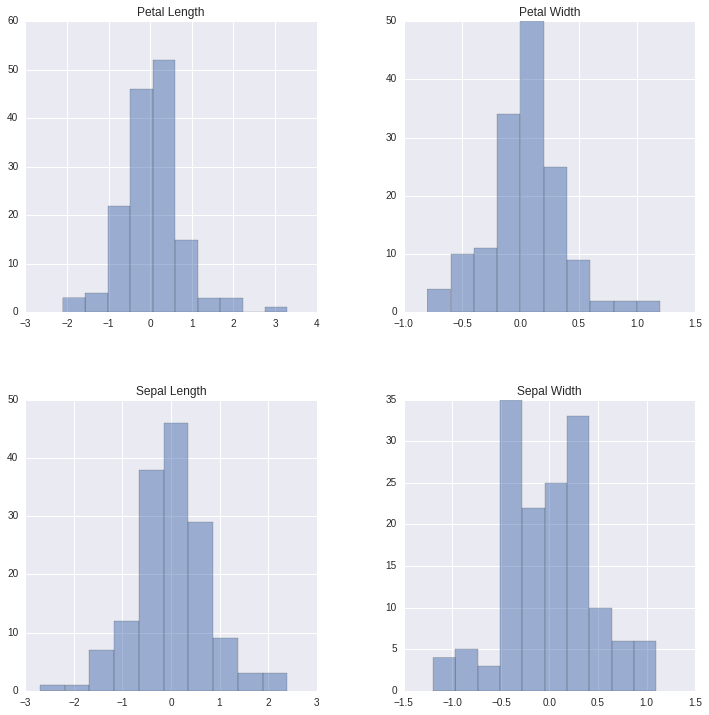

In [10]:

X_bis.diff().hist(alpha = 0.5, figsize = (12,12))

In [11]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
           medians='DarkBlue', caps='Gray')

for tar in X['target'].unique():
    newX = X[X['target'] == tar]
    print('processing for target {0}').format(tar)

    print(newX.describe())
    plt.show()

processing for target Setosa
       Sepal Length  Sepal Width  Petal Length  Petal Width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000
processing for target Versicolou
       Sepal Length  Sepal Width  Petal Length  Petal Width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      

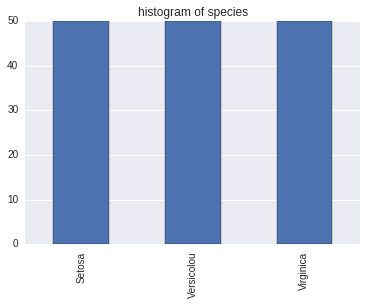

In [12]:
plt.figure()
X['target'].value_counts().plot(kind = 'bar')
plt.title('histogram of species')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73110a94d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7310eb9550>]], dtype=object)

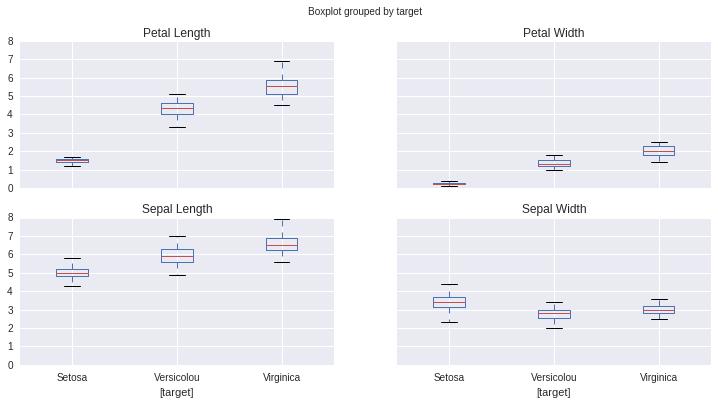

In [13]:
X.boxplot(by= 'target', figsize = (12,6))


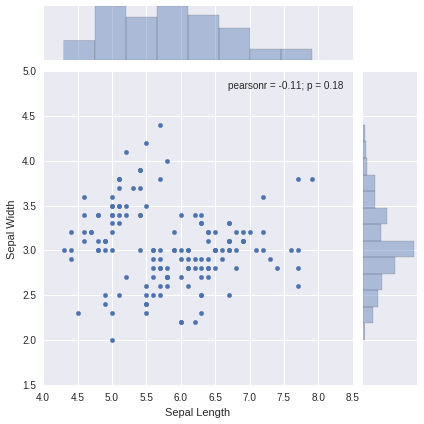

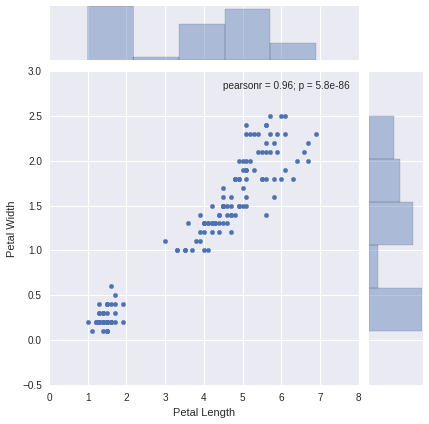

In [14]:
sns.jointplot(x="Sepal Length", y="Sepal Width", data=X, size=6)
sns.jointplot(x="Petal Length", y="Petal Width", data=X, size=6)

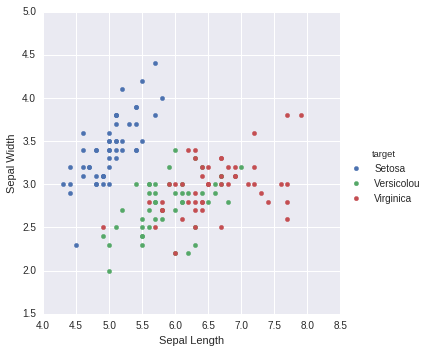

In [15]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(X, hue="target", size=5) \
   .map(plt.scatter, "Sepal Length", "Sepal Width") \
   .add_legend()

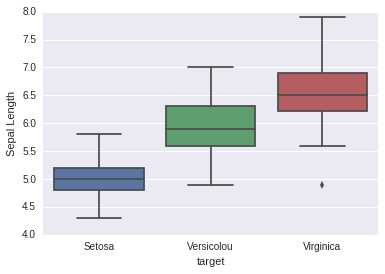

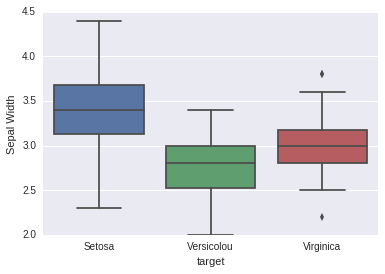

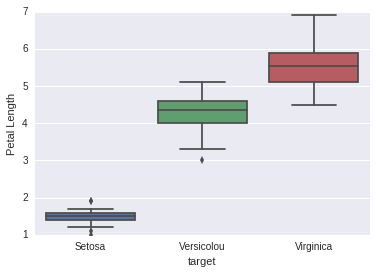

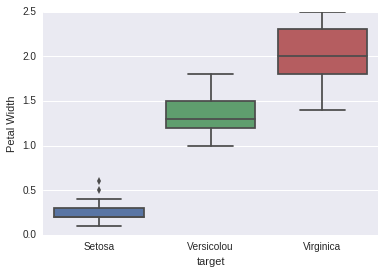

In [16]:
## looking t individual features
for col in list(X.columns):
    if col not in ['target']:
        sns.boxplot(x="target", y=col, data=X)
        plt.show()

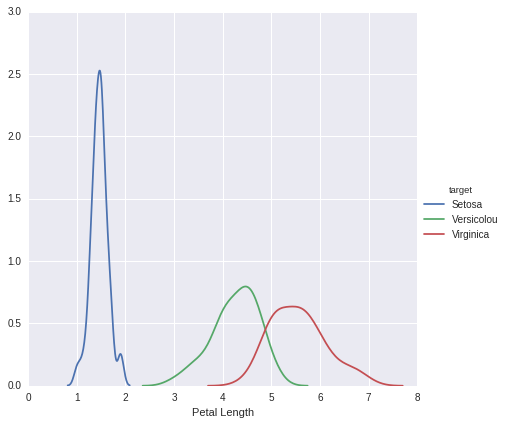

In [17]:
sns.FacetGrid(X, hue="target", size=6) \
   .map(sns.kdeplot, "Petal Length") \
   .add_legend()

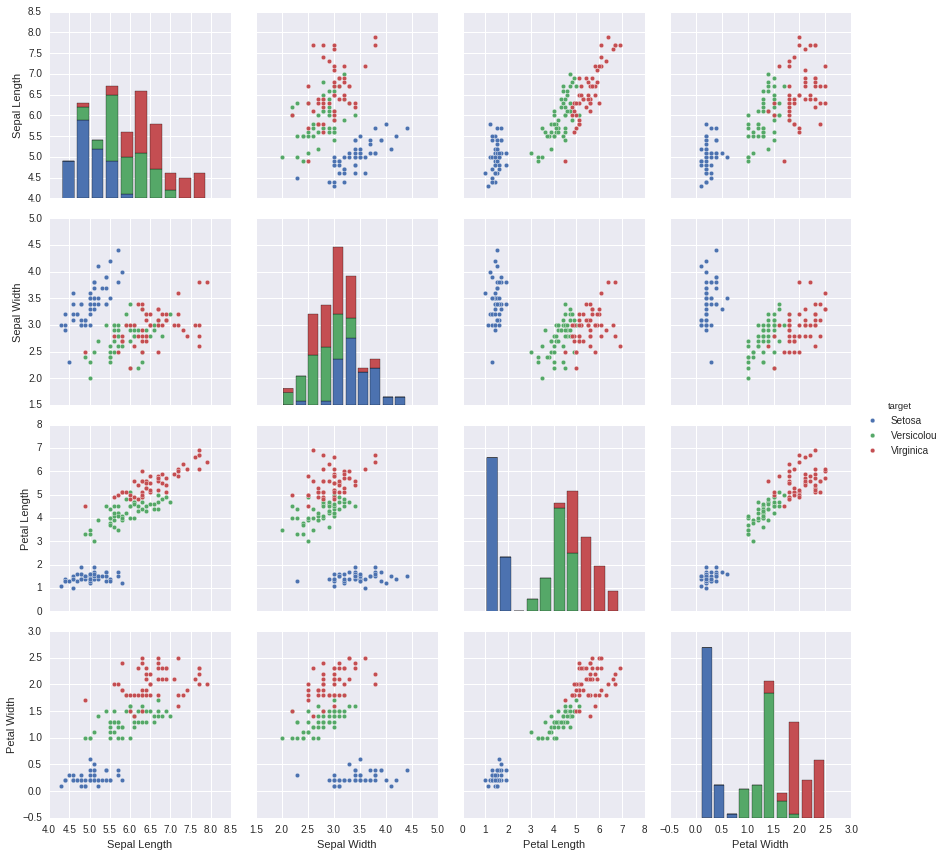

In [18]:


# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations <3 seaborn
sns.pairplot(X, hue="target", size=3)



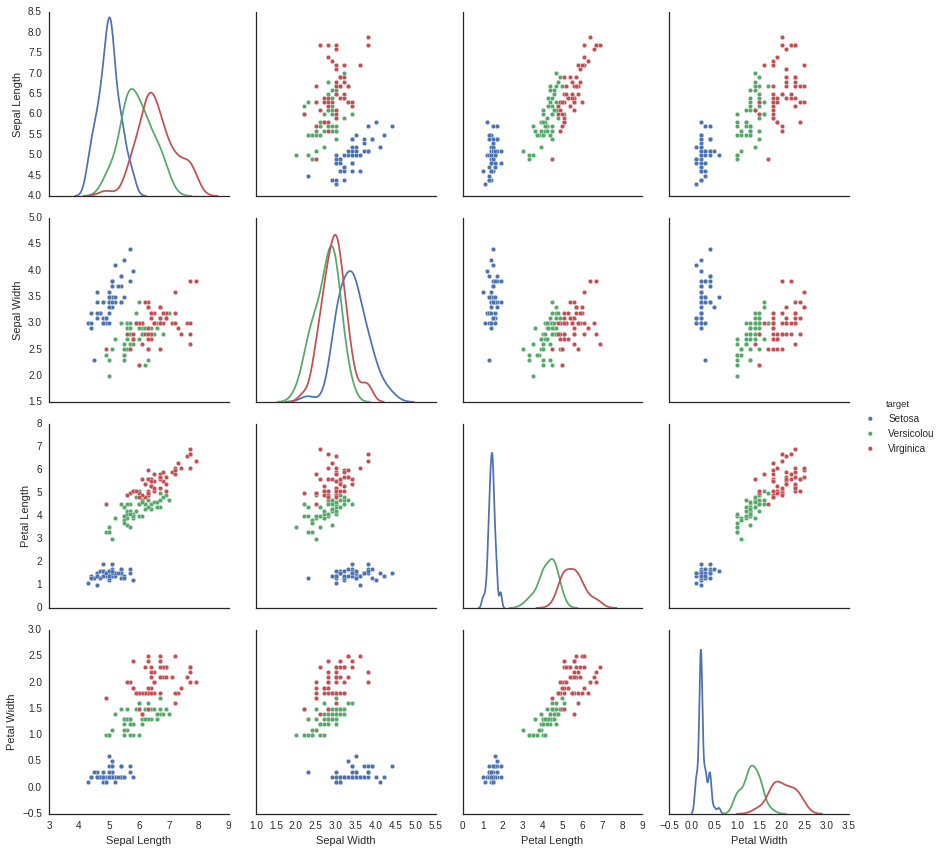

In [19]:
sns.set(style="white", color_codes=True)
sns.pairplot(X, hue="target", size=3, diag_kind="kde")

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


In [ ]:

iris = load_iris()
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()